# Plot FRAP data


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math
import pandas as pd

## Data locations and info

In [2]:
# Hardcode the path to the data for each condition and name the conditions
data_dir = "../data/FRAP/"
out_dir = "../plots/FRAP/"

file_name_8min = "FRAP_8min_summary.csv"
file_name_30min = "FRAP_30min_summary.csv"

condition1_8min = "Fat2_8min"
condition2_8min = "Lar_8min"
condition3_8min = "Sema5c_8min"
condition4_8min = "Lar_fat2N1032_8min"
condition5_8min = "Sema5c_fat2N1032_8min"

condition1_30min = "Fat2_30min"

output_plots = True


## Plot parameters

In [3]:
c_red = '#EA0A0A' # red
c_red_pale = '#F26C6C' # pale red

c_yellow_pale = '#FFE966'# pale yellow
c_yellow_darker = '#FFA500'# orange-yellow

c_cyan = '#1AC1BC' # cyan
c_cyan_pale = '#76DAD7' # pale cyan

c_fat2N = "#7B7B7B" # medium gray
c_fat2N_pale = "#B0B0B0"

c_spines = "#000000" # black


x_ticks_8min = [0,2,4,6,8]
x_ticks_30min = [0,10,20,30]
y_ticks = [0,0.5, 1]
x_lim_8min = [-.333,8] # 8 min datasets
x_lim_30min = [-1,30]
y_lim = [0,1.25]
line_width = 1.5
line_width_black = 2
spine_width = 1.5

## Import the intensities data


In [4]:
df_summary_8min = pd.read_csv(os.path.join(data_dir, file_name_8min), index_col = 0)
df_summary_30min = pd.read_csv(os.path.join(data_dir, file_name_30min), index_col = 0)

df_8min_cond1 = df_summary_8min[df_summary_8min["condition"] == condition1_8min]
df_8min_cond2 = df_summary_8min[df_summary_8min["condition"] == condition2_8min]
df_8min_cond3 = df_summary_8min[df_summary_8min["condition"] == condition3_8min]
df_8min_cond4 = df_summary_8min[df_summary_8min["condition"] == condition4_8min]
df_8min_cond5 = df_summary_8min[df_summary_8min["condition"] == condition5_8min]

df_30min_cond1 = df_summary_30min[df_summary_30min["condition"] == condition1_30min]

## Plot 8 min datasets


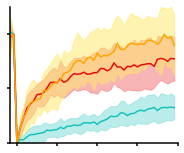

In [5]:
out_name = "FRAP_8min_Fat2_Lar_Sema5c"
fig, ax = plt.subplots(1,figsize=(3,2.5))

# Add lines
ax.plot(df_8min_cond1["t_min"], df_8min_cond1["mean_rescaled"], c_cyan, linewidth = line_width)
ax.plot(df_8min_cond2["t_min"], df_8min_cond2["mean_rescaled"], c_red, linewidth = line_width)
ax.plot(df_8min_cond3["t_min"], df_8min_cond3["mean_rescaled"], c_yellow_darker, linewidth = line_width)

# Add stdev clouds
ax.fill_between(df_8min_cond1["t_min"], df_8min_cond1["mean_rescaled"]-df_8min_cond1["std_rescaled"],
                df_8min_cond1["mean_rescaled"]+df_8min_cond1["std_rescaled"], color=c_cyan_pale, alpha=0.5) 
ax.fill_between(df_8min_cond2["t_min"], df_8min_cond2["mean_rescaled"]-df_8min_cond2["std_rescaled"],
                df_8min_cond2["mean_rescaled"]+df_8min_cond2["std_rescaled"], color=c_red_pale, alpha=0.5) 
ax.fill_between(df_8min_cond3["t_min"], df_8min_cond3["mean_rescaled"]-df_8min_cond3["std_rescaled"],
                df_8min_cond3["mean_rescaled"]+df_8min_cond3["std_rescaled"], color=c_yellow_pale, alpha=0.5) 

# Adjust the axes
ax.set_xlim(x_lim_8min[0],x_lim_8min[1])
ax.set_ylim(y_lim[0],y_lim[1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adjust the ticks
ax.set_xticks(x_ticks_8min)
ax.set_yticks(y_ticks)
ax.tick_params(axis='both', width=spine_width, length=3)

if output_plots == True:
    plt.savefig(out_dir + out_name + '_labeled.pdf') 

# Make an unlabeled version
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])

if output_plots == True:
    plt.savefig(out_dir + out_name + '_unlabeled.pdf') 
    

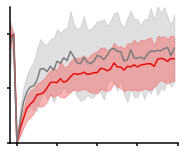

In [6]:
# Labeled and unlabeled versions of Lar-3xGFP in control and fat2N103-2
out_name = "FRAP_8min_Lar_fat2N1032"
fig, ax = plt.subplots(1,figsize=(3,2.5))

# Add lines
ax.plot(df_8min_cond2["t_min"], df_8min_cond2["mean_rescaled"], c_red, linewidth = line_width)
ax.plot(df_8min_cond4["t_min"], df_8min_cond4["mean_rescaled"], c_fat2N, linewidth = line_width)

# Add stdev clouds
ax.fill_between(df_8min_cond4["t_min"], df_8min_cond4["mean_rescaled"]-df_8min_cond4["std_rescaled"],
                df_8min_cond4["mean_rescaled"]+df_8min_cond4["std_rescaled"], color=c_fat2N_pale, alpha=0.4) 
ax.fill_between(df_8min_cond2["t_min"], df_8min_cond2["mean_rescaled"]-df_8min_cond2["std_rescaled"],
                df_8min_cond2["mean_rescaled"]+df_8min_cond2["std_rescaled"], color=c_red_pale, alpha=0.5) 

# Adjust the axes
ax.set_xlim(x_lim_8min[0],x_lim_8min[1])
ax.set_ylim(y_lim[0],y_lim[1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adjust the ticks
ax.set_xticks(x_ticks_8min)
ax.set_yticks(y_ticks)
ax.tick_params(axis='both', width=spine_width, length=3)

if output_plots == True:
    plt.savefig(out_dir + out_name + '_labeled.pdf') 

# Make an unlabeled version
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])

if output_plots == True:
    plt.savefig(out_dir + out_name + '_unlabeled.pdf') 
    

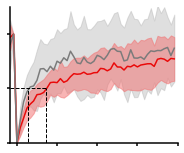

In [7]:
# Labeled and unlabeled versions of Lar-3xGFP in control and fat2N103-2,
# with lines indicating time to 1/2 recovery
out_name = "FRAP_8min_Lar_fat2N1032_tHalfLines"
fig, ax = plt.subplots(1,figsize=(3,2.5))

# Add lines
ax.plot(df_8min_cond2["t_min"], df_8min_cond2["mean_rescaled"], c_red, linewidth=line_width)
ax.plot(df_8min_cond4["t_min"], df_8min_cond4["mean_rescaled"], c_fat2N, linewidth=line_width)

# Add stdev clouds
ax.fill_between(df_8min_cond4["t_min"], df_8min_cond4["mean_rescaled"]-df_8min_cond4["std_rescaled"],
                df_8min_cond4["mean_rescaled"]+df_8min_cond4["std_rescaled"], color=c_fat2N_pale, alpha=0.4) 
ax.fill_between(df_8min_cond2["t_min"], df_8min_cond2["mean_rescaled"]-df_8min_cond2["std_rescaled"],
                df_8min_cond2["mean_rescaled"]+df_8min_cond2["std_rescaled"], color=c_red_pale, alpha=0.5) 

# Add dotted lines indicating time to 1/2 recovery
hline_y = 0.5
intercept_Lar = 1.45
intercept_Lar_fat2N1032 = 0.57

if intercept_Lar > intercept_Lar_fat2N1032:
    intercept_max = intercept_Lar
else:
    intercept_max = intercept_Lar_fat2N1032
dash_len = (1, 2)
ax.hlines(hline_y, x_lim_8min[0], intercept_max, colors=c_spines, linewidth = 1, linestyle='--', zorder=3)
ax.vlines(intercept_Lar, y_lim[0], hline_y, colors=c_spines, linewidth = 1, linestyle='--', zorder=3)
ax.vlines(intercept_Lar_fat2N1032, x_lim_8min[0], hline_y, colors=c_spines, linewidth = 1, linestyle='--', zorder=3)

# Adjust the axes
ax.set_xlim(x_lim_8min[0],x_lim_8min[1])
ax.set_ylim(y_lim[0],y_lim[1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adjust the ticks
ax.set_xticks(x_ticks_8min)
ax.set_yticks(y_ticks)
ax.tick_params(axis='both', width=spine_width, length=3)

# Add title
ax.set_title(f"Time to half recovery: {intercept_Lar}, {intercept_Lar_fat2N1032} min", fontsize=10)

if output_plots == True:
    plt.savefig(out_dir + out_name + '_labeled.pdf') 

# Make an unlabeled version
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.set_title("")

if output_plots == True:
    plt.savefig(out_dir + out_name + '_unlabeled.pdf') 
    

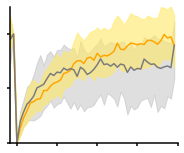

In [8]:
# Labeled and unlabeled versions of Sema5c-3xGFP in control and fat2N103-2
out_name = "FRAP_8min_Sema5c_fat2N1032"
fig, ax = plt.subplots(1,figsize=(3,2.5))

# Add lines
ax.plot(df_8min_cond3["t_min"], df_8min_cond3["mean_rescaled"], c_yellow_darker, linewidth = line_width)
ax.plot(df_8min_cond5["t_min"], df_8min_cond5["mean_rescaled"], c_fat2N, linewidth = line_width)

# Add stdev clouds
ax.fill_between(df_8min_cond5["t_min"], df_8min_cond5["mean_rescaled"]-df_8min_cond4["std_rescaled"],
                df_8min_cond5["mean_rescaled"]+df_8min_cond5["std_rescaled"], color=c_fat2N_pale, alpha=0.4) 
ax.fill_between(df_8min_cond3["t_min"], df_8min_cond3["mean_rescaled"]-df_8min_cond2["std_rescaled"],
                df_8min_cond3["mean_rescaled"]+df_8min_cond3["std_rescaled"], color=c_yellow_pale, alpha=0.6) 

# Adjust the axes
ax.set_xlim(x_lim_8min[0],x_lim_8min[1])
ax.set_ylim(y_lim[0],y_lim[1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adjust the ticks
ax.set_xticks(x_ticks_8min)
ax.set_yticks(y_ticks)
ax.tick_params(axis='both', width=spine_width, length=3)

if output_plots == True:
    plt.savefig(out_dir + out_name + '_labeled.pdf') 

# Make an unlabeled version
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])

if output_plots == True:
    plt.savefig(out_dir + out_name + '_unlabeled.pdf') 
    

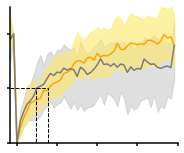

In [9]:
# Labeled and unlabeled versions of Sema5c-3xGFP in control and fat2N103-2,
# with lines indicating time to 1/2 recovery
out_name = "FRAP_8min_Sema5c_fat2N1032_tHalfLines"
fig, ax = plt.subplots(1,figsize=(3,2.5))

# Add lines
ax.plot(df_8min_cond3["t_min"], df_8min_cond3["mean_rescaled"], c_yellow_darker, linewidth = line_width)
ax.plot(df_8min_cond5["t_min"], df_8min_cond5["mean_rescaled"], c_fat2N, linewidth = line_width)

# Add stdev clouds
ax.fill_between(df_8min_cond5["t_min"], df_8min_cond5["mean_rescaled"]-df_8min_cond4["std_rescaled"],
                df_8min_cond5["mean_rescaled"]+df_8min_cond5["std_rescaled"], color=c_fat2N_pale, alpha=0.4) 
ax.fill_between(df_8min_cond3["t_min"], df_8min_cond3["mean_rescaled"]-df_8min_cond2["std_rescaled"],
                df_8min_cond3["mean_rescaled"]+df_8min_cond3["std_rescaled"], color=c_yellow_pale, alpha=0.6) 

# Add vline at 30 sec, hlines where the datasets intersect with it
hline_y = 0.5
intercept_Sema5c = 1.54
intercept_Sema5c_fat2N1032 = 0.94
if intercept_Sema5c > intercept_Sema5c_fat2N1032:
    intercept_max = intercept_Sema5c
else:
    intercept_max = intercept_Sema5c_fat2N1032
dash_len = (1, 2)
ax.hlines(hline_y, x_lim_8min[0], intercept_max, colors=c_spines, linewidth=1, linestyle='--', zorder=3)
ax.vlines(intercept_Sema5c, y_lim[0], hline_y, colors=c_spines, linewidth=1, linestyle='--', zorder=3)
ax.vlines(intercept_Sema5c_fat2N1032, x_lim_8min[0], hline_y, colors=c_spines, linewidth=1, linestyle='--', zorder=3)

# Adjust the axes
ax.set_xlim(x_lim_8min[0],x_lim_8min[1])
ax.set_ylim(y_lim[0],y_lim[1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adjust the ticks
ax.set_xticks(x_ticks_8min)
ax.set_yticks(y_ticks)
ax.tick_params(axis='both', width=spine_width, length=3)

# Add title
ax.set_title(f"Time to half recovery: {intercept_Sema5c}, {intercept_Sema5c_fat2N1032} min", fontsize=10)

if output_plots == True:
    plt.savefig(out_dir + out_name + '_labeled.pdf') 

# Make an unlabeled version
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.set_title("")

if output_plots == True:
    plt.savefig(out_dir + out_name + '_unlabeled.pdf') 
    

## Plot 30 min dataset

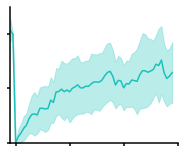

In [10]:
out_name = "FRAP_30min_Fat2"

fig, ax = plt.subplots(1,figsize=(3,2.5))

# Add lines
ax.plot(df_30min_cond1['t_min'], df_30min_cond1['mean_rescaled'], c_cyan, linewidth = line_width)

# Add stdev clouds
ax.fill_between(df_30min_cond1['t_min'], df_30min_cond1['mean_rescaled']-df_30min_cond1['std_rescaled'],
                df_30min_cond1['mean_rescaled']+df_30min_cond1['std_rescaled'], color=c_cyan_pale, alpha=0.5) 

# Adjust the axes
ax.set_xlim(x_lim_30min[0],x_lim_30min[1])
ax.set_ylim(y_lim[0],y_lim[1])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(spine_width)
ax.spines['bottom'].set_linewidth(spine_width)

# Adjust the ticks
ax.set_xticks(x_ticks_30min)
ax.set_yticks(y_ticks)

ax.tick_params(axis='both', width=spine_width, length=3)

if output_plots == True:
    plt.savefig(out_dir + out_name + '_labeled.pdf') 
    
# Make an unlabeled version
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])

if output_plots == True:
    plt.savefig(out_dir + out_name + '_unlabeled.pdf') 
    